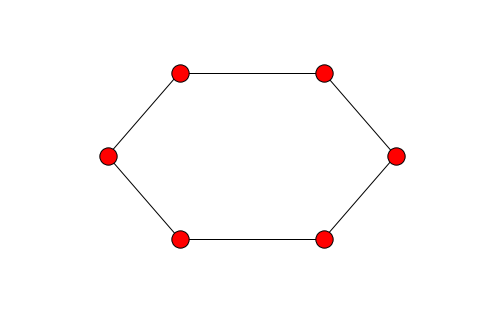

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as spd
%matplotlib inline
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()
    return graph

# draw example
graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20)]
graph = draw_graph(graph)

In [2]:

spd.squareform(spd.pdist(graph))<2

array([[ True,  True, False, False, False, False],
       [ True,  True,  True, False, False, False],
       [False,  True,  True,  True, False, False],
       [False, False,  True,  True,  True, False],
       [False, False, False,  True,  True, False],
       [False, False, False, False, False,  True]], dtype=bool)

In [3]:
spd.euclidean(graph[0], graph[2])

2.8284271247461903

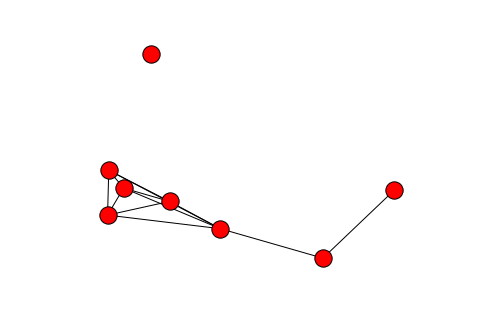

In [4]:

def uniform_layout(G, dim=2):
    n=len(G)
    pos=np.asarray(np.random.uniform(size=(n,dim)),dtype=np.float32)
    return dict(zip(G,pos))
# draw graph
G=nx.empty_graph(8)
pos = uniform_layout(G)

def plot_edgy_layout(G,pos):

    meand = spd.squareform(spd.pdist(list(pos.values()))).mean()
    for edge in np.asarray(np.where(np.tril(spd.squareform(spd.pdist(list(pos.values())))<meand, -1))).T:
        G.add_edge(edge[0], edge[1])
    nx.draw(G, pos)
    
    
plot_edgy_layout(G,pos)

circular_layout


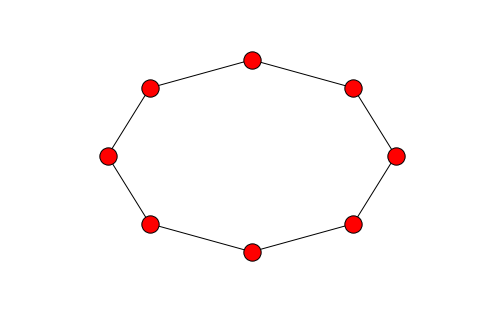

random_layout


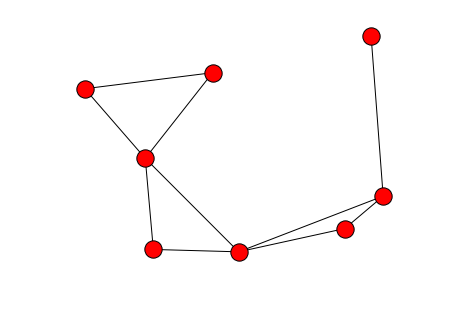

shell_layout


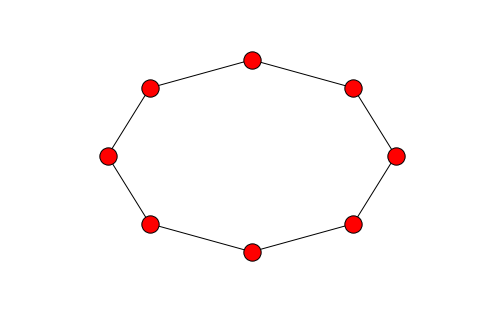

spring_layout


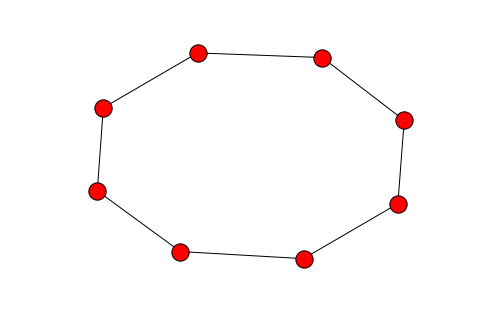

spectral_layout


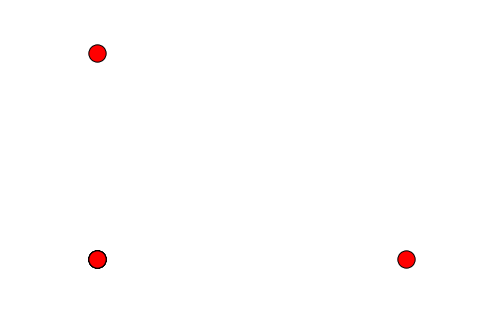

fruchterman_reingold_layout


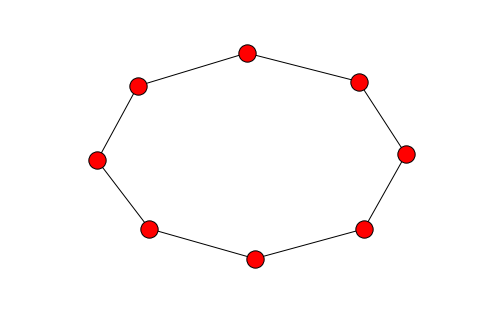

In [5]:
for alg in nx.drawing.layout.__all__:
    print alg
    algf = getattr(nx,alg)
    G=nx.empty_graph(8)
    pos = algf(G)
    plot_edgy_layout(G,pos)
    plt.show()


In [65]:
nodes =  {1:(-2.5,0.3),
        2:(-1.75,-0.55),
        3:(-1.2,0.55),
        4:(-0.75,-0.7),
        5:(-0.25,0),
        6:(0.25,0.7),
        7:(0.75,-0.3), 
        8:(1.5,0),
        9:(2.5,0.4)
}
posalt = { i+1:t for i,t in enumerate(map(tuple,nx.drawing.layout._rescale_layout(np.asarray(nodes.values()))))}


(0, 8)

In [9]:
edges = [
    (1,2),
    (1,3),
    (2,3),
    (3,6),
    (2,4),
    (5,6),
    (5,4),
    (5,2),
    (5,7),
    (6,7),
    (6,9),
    (6,8),
    (8,9),
    (7,8) 
]

In [107]:
from itertools import combinations
from collections import OrderedDict
distm=spd.squareform(spd.pdist(list(nodes.values())))
maxv = np.unravel_index(distm.argmax(), distm.shape)
G=nx.Graph()
G.add_edges_from(combinations(nodes,2))
Gs=OrderedDict()


carefulnow=False

while len(G.edges())>1:
    dists = {(u,v):distm[u-1,v-1] for u,v in G.edges()}
    long_edges = sorted(dists, key=dists.get, reverse=True)
    dens=round(nx.density(G),2)
    conn = nx.node_connectivity(G)
    
    Gs[dens]=G.copy()
    edge_removed = False

    if carefulnow:
        #Try to avoid connectivity breaking
        for i,(u,v) in enumerate(long_edges):
            G.remove_edge(u,v)
            if nx.node_connectivity(G) < conn:
                G.add_edge(u,v)
            else:
                edge_removed=True
                break
    else:
        edge_removed=False
    if not edge_removed:
        # We haven't removed an edge; force it
        u,v = long_edges[0]
        G.remove_edge(u,v)


In [108]:
for d,G in Gs.items():
    print "$D={d},k={k}$".format(d=d,k=nx.node_connectivity(G)),','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), G.edges()))

$D=1.0,k=8$ {1/2},{1/3},{1/4},{1/5},{1/6},{1/7},{1/8},{1/9},{2/3},{2/4},{2/5},{2/6},{2/7},{2/8},{2/9},{3/4},{3/5},{3/6},{3/7},{3/8},{3/9},{4/5},{4/6},{4/7},{4/8},{4/9},{5/6},{5/7},{5/8},{5/9},{6/7},{6/8},{6/9},{7/8},{7/9},{8/9}
$D=0.97,k=7$ {1/2},{1/3},{1/4},{1/5},{1/6},{1/7},{1/8},{2/3},{2/4},{2/5},{2/6},{2/7},{2/8},{2/9},{3/4},{3/5},{3/6},{3/7},{3/8},{3/9},{4/5},{4/6},{4/7},{4/8},{4/9},{5/6},{5/7},{5/8},{5/9},{6/7},{6/8},{6/9},{7/8},{7/9},{8/9}
$D=0.94,k=6$ {1/2},{1/3},{1/4},{1/5},{1/6},{1/7},{1/8},{2/3},{2/4},{2/5},{2/6},{2/7},{2/8},{3/4},{3/5},{3/6},{3/7},{3/8},{3/9},{4/5},{4/6},{4/7},{4/8},{4/9},{5/6},{5/7},{5/8},{5/9},{6/7},{6/8},{6/9},{7/8},{7/9},{8/9}
$D=0.92,k=6$ {1/2},{1/3},{1/4},{1/5},{1/6},{1/7},{2/3},{2/4},{2/5},{2/6},{2/7},{2/8},{3/4},{3/5},{3/6},{3/7},{3/8},{3/9},{4/5},{4/6},{4/7},{4/8},{4/9},{5/6},{5/7},{5/8},{5/9},{6/7},{6/8},{6/9},{7/8},{7/9},{8/9}
$D=0.89,k=5$ {1/2},{1/3},{1/4},{1/5},{1/6},{1/7},{2/3},{2/4},{2/5},{2/6},{2/7},{2/8},{3/4},{3/5},{3/6},{3/7},{3/8},{4/5},

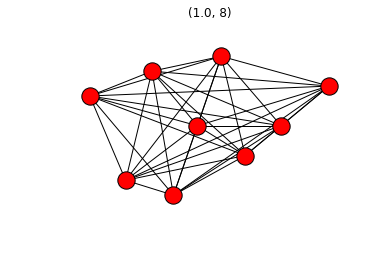

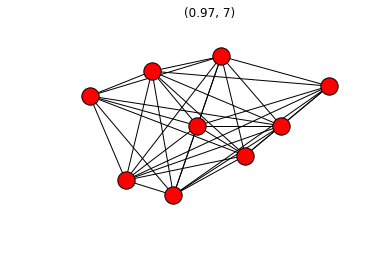

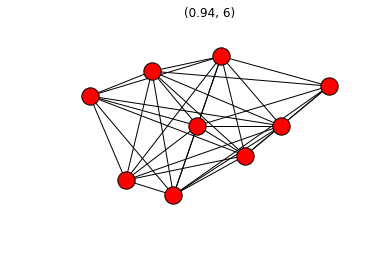

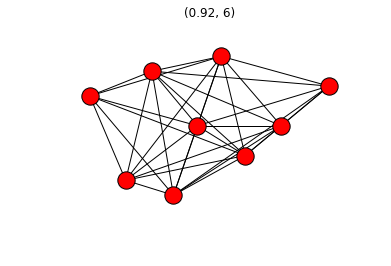

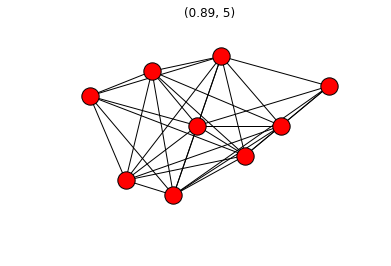

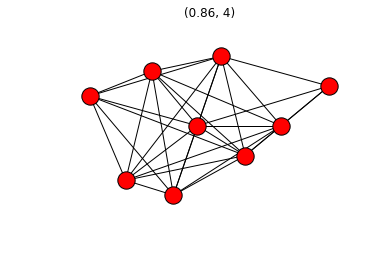

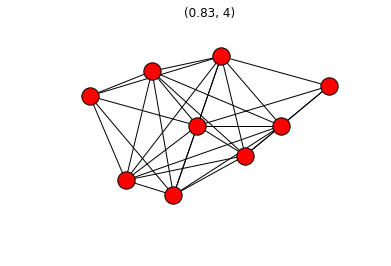

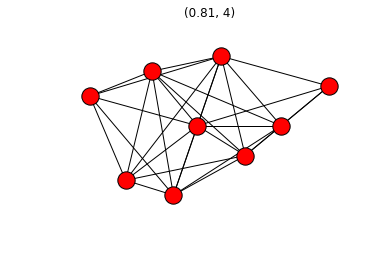

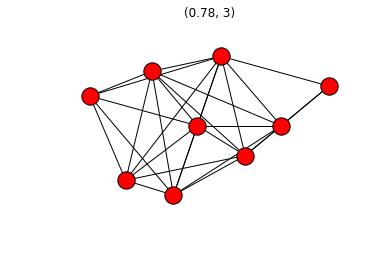

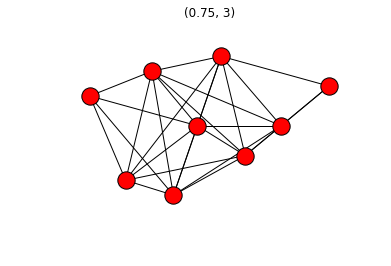

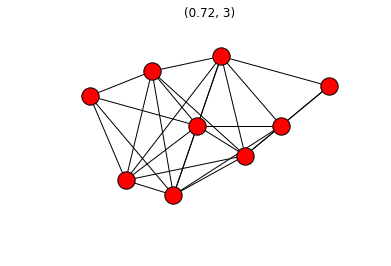

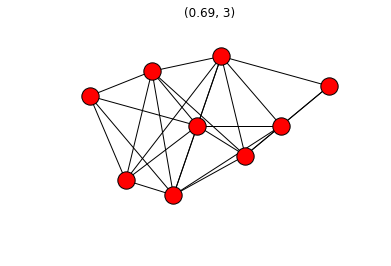

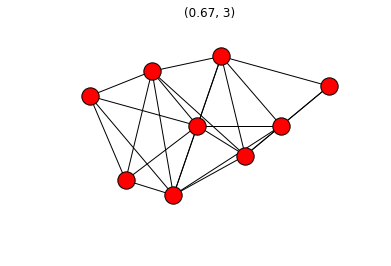

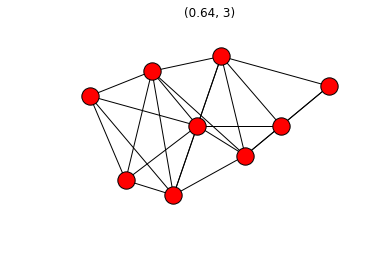

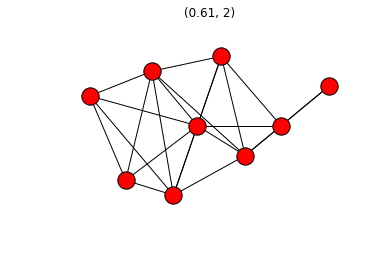

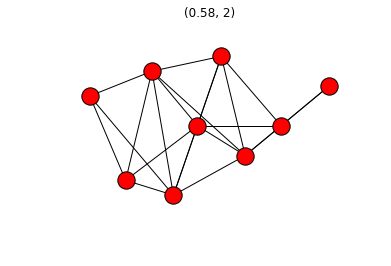

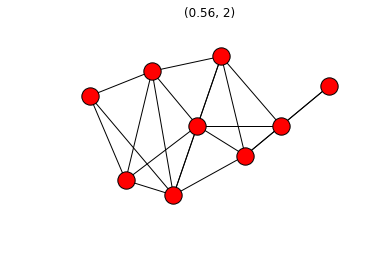

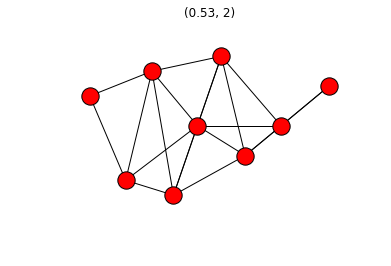

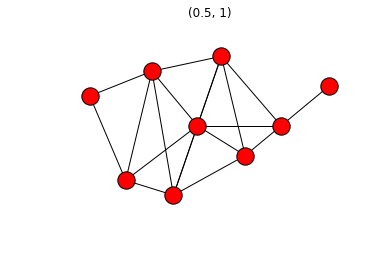

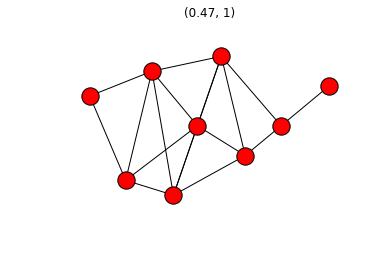

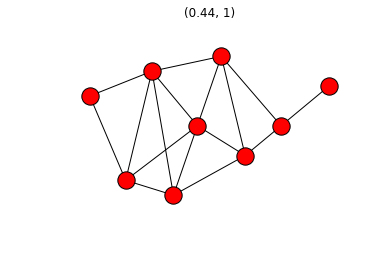

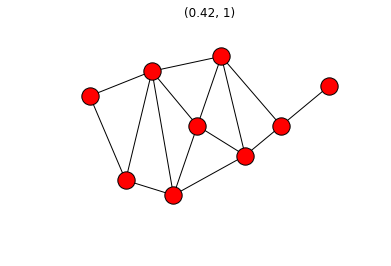

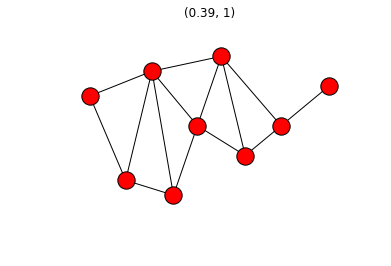

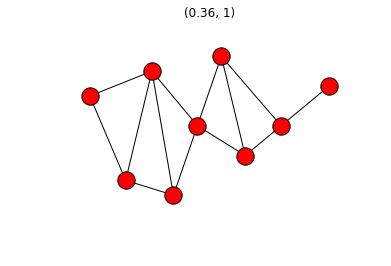

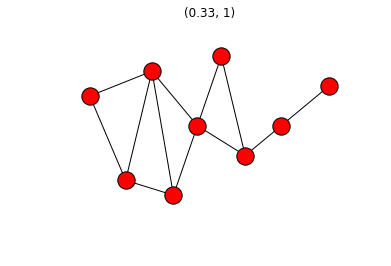

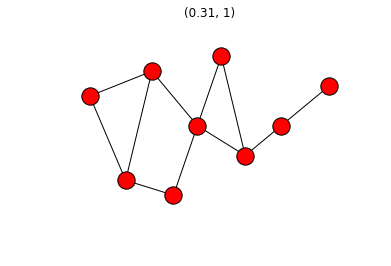

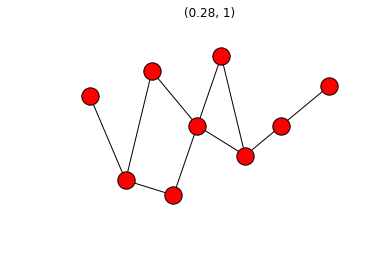

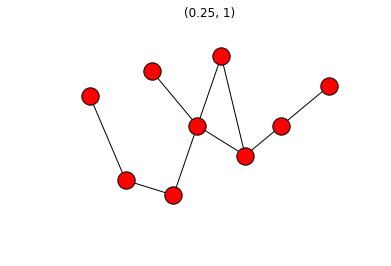

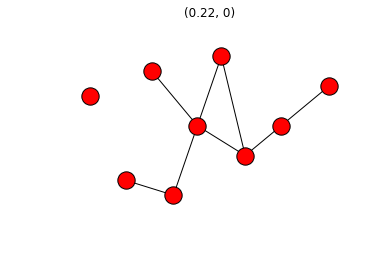

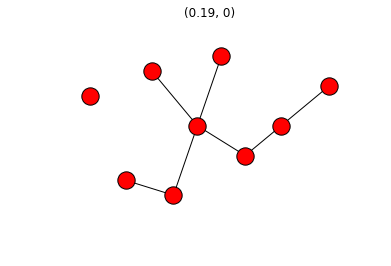

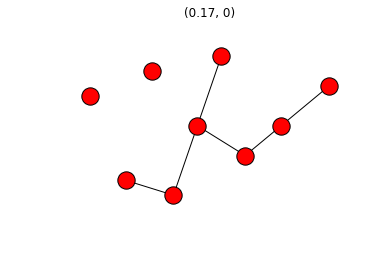

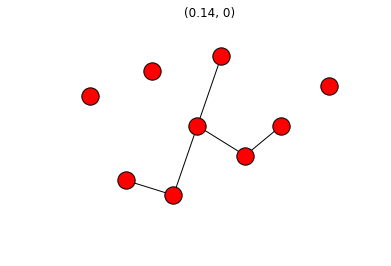

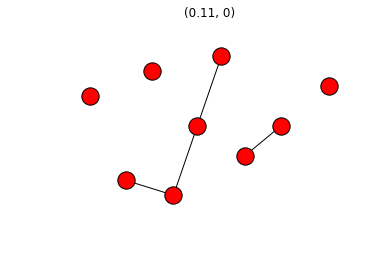

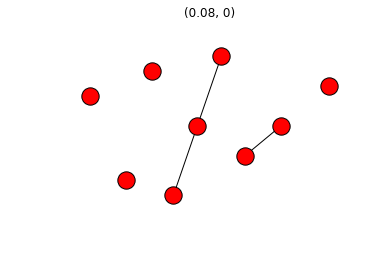

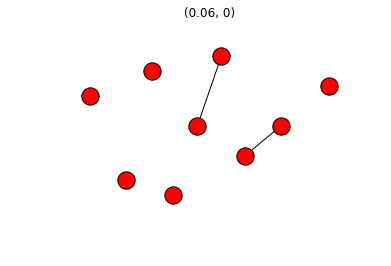

In [109]:
for d,G in Gs.items():
    plt.title((d,nx.node_connectivity(G)))
    nx.draw(G,posalt)
    plt.show()

0.222222222222 1


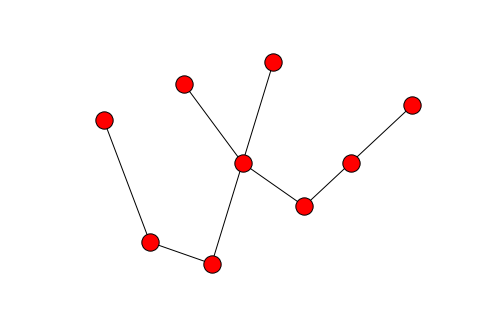

In [149]:
G=Gs[0.25].copy()
G.remove_edge(6,7)
nx.draw(G,posalt)
print nx.density(G), nx.node_connectivity(G)

0.194444444444 0


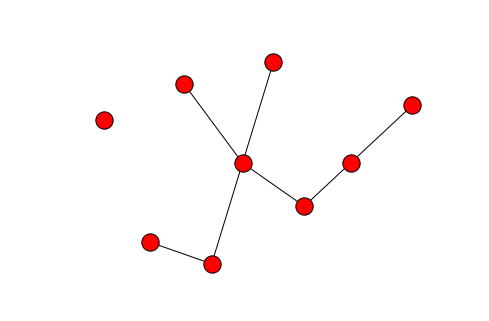

In [115]:
G=Gs[0.22].copy()
G.remove_edge(6,7)
nx.draw(G,posalt)
print nx.density(G), nx.node_connectivity(G)

In [19]:
print nx2tikz.dumps_tikz(G)

\begin{tikzpicture}
\graph[layered layout, sibling distance=5.0cm,edges={nodes={ sloped, inner sep=10pt } },nodes={circle, draw} ]{
1;
2;
3;
4;
5;
6;
7;
8;
9;

1 -- 2;
1 -- 3;
2 -- 3;
2 -- 4;
2 -- 5;
3 -- 6;
4 -- 5;
5 -- 6;
5 -- 7;
6 -- 8;
6 -- 9;
6 -- 7;
7 -- 8;
8 -- 9;
};
\end{tikzpicture}



In [ ]:
import nx2tikz

In [32]:
for k,v in nodes.items(): 
    print

{1/(-2.5, 0.3)}
{2/(-1.75, -0.55)}
{3/(-1.2, 0.55)}
{4/(-0.75, -0.7)}
{5/(-0.25, 0)}
{6/(0.25, 0.7)}
{7/(0.75, -0.3)}
{8/(1.5, 0)}
{9/(2.5, 0.4)}


In [37]:
nodestr=','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), nodes.items()))
edgestr=','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), edges))

AttributeError: 'list' object has no attribute 'items'

In [237]:
def posalt(nodes):
    return { i+1:t for i,t in enumerate(map(tuple,nx.drawing.layout._rescale_layout(np.asarray(nodes.values()))))}


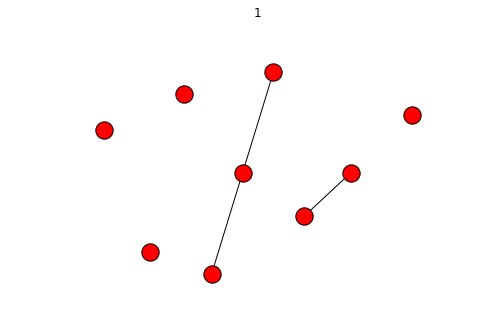

{4/5},{5/6},{7/8}
$r=1,D=0.08,k=0$

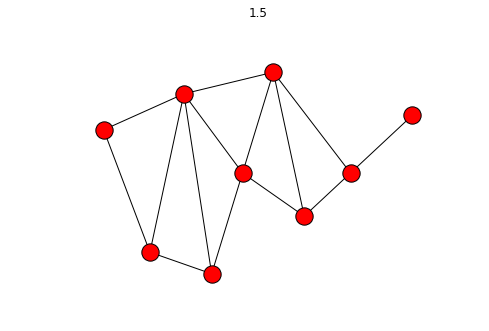

 {1/2},{1/3},{2/3},{2/4},{3/4},{3/5},{3/6},{4/5},{5/6},{5/7},{6/8},{6/7},{7/8},{8/9}
$r=1.5,D=0.39,k=1$

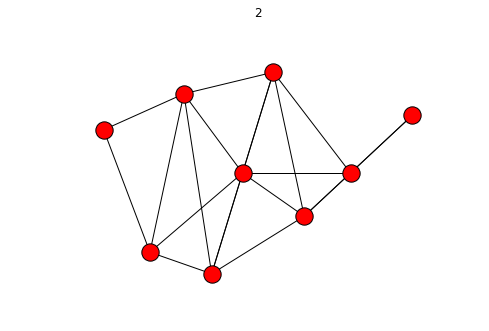

 {1/2},{1/3},{2/3},{2/4},{2/5},{3/4},{3/5},{3/6},{4/5},{4/6},{4/7},{5/6},{5/7},{5/8},{6/8},{6/7},{7/8},{7/9},{8/9}
$r=2,D=0.53,k=2$

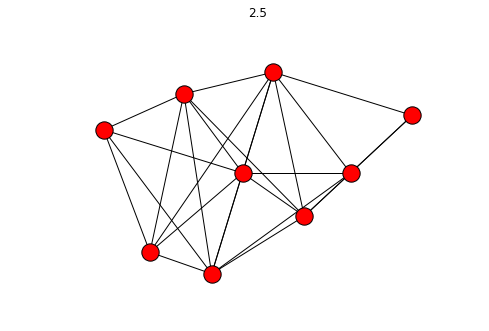

 {1/2},{1/3},{1/4},{1/5},{2/3},{2/4},{2/5},{2/6},{3/4},{3/5},{3/6},{3/7},{4/5},{4/6},{4/7},{4/8},{5/6},{5/7},{5/8},{6/7},{6/8},{6/9},{7/8},{7/9},{8/9}
$r=2.5,D=0.69,k=3$


In [264]:
def ranges(d):
    G=nx.Graph()
    G.add_nodes_from(nodes.keys())
    D=np.tril(spd.squareform(spd.pdist(list(nodes.values()))),-1)
    D[D==0.0]=np.nan
    for edge in np.asarray(np.where(D<d)).T:
        G.add_edge(edge[0]+1, edge[1]+1)
    nx.draw(G, posalt(nodes))
    plt.title(d)
    plt.show()
    print ','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), G.edges()))
    return G

for d in [1,1.5,2,2.5]:
    G=ranges(d)
    print "$r={r},D={d},k={k}$".format(r=d,d=round(nx.density(G),2),k=nx.node_connectivity(G)),

{1/2},{1/3},{2/3},{2/4},{2/9},{3/4},{3/5},{3/6},{4/9},{4/5},{5/6},{5/7},{6/8},{6/7},{7/8}
{1/(-2.5, 0.3)},{2/(-1.75, -0.55)},{3/(-1.2, 0.55)},{4/(-0.75, -0.7)},{5/(-0.25, 0)},{6/(0.25, 0.7)},{7/(0.75, -0.3)},{8/(1.5, 0)},{9/(-1, -1.4)}


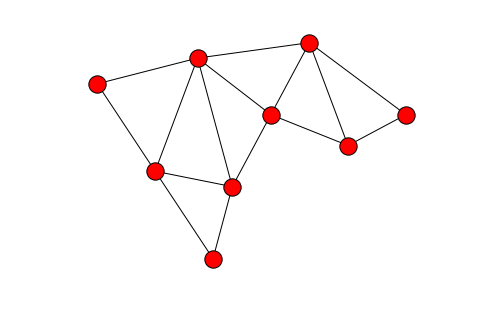

In [254]:
G=nx.Graph()
nodes_moved = nodes.copy()
nodes_moved[9]=(-1,-1.4)
G.add_nodes_from(nodes_moved.keys())
D=np.tril(spd.squareform(spd.pdist(list(nodes_moved.values()))),-1)
D[D==0.0]=np.nan
for edge in np.asarray(np.where(D<1.5)).T:
    G.add_edge(edge[0]+1, edge[1]+1)
nx.draw(G, posalt(nodes_moved))
print ','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), G.edges()))
print ','.join(map( lambda t :'{{{k}/{v}}}'.format(k=t[0],v=t[1]), nodes_moved.items()))

In [225]:
D

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [ 1.1335784 ,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [ 1.32382023,  1.22983739,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [ 2.01556444,  1.01118742,  1.32853303,         nan,         nan,
                nan,         nan,         nan,         nan],
       [ 2.26991189,  1.59765453,  1.09772492,  0.86023253,         nan,
                nan,         nan,         nan,         nan],
       [ 2.77893865,  2.35849528,  1.45773797,  1.72046505,  0.86023253,
                nan,         nan,         nan,         nan],
       [ 3.30492057,  2.51246891,  2.12720474,  1.55241747,  1.04403065,
         1.11803399,         nan,         nan,         nan],
       [ 4.01123422,  3.29620994,  2.75544915,  2.35637433,  1

In [145]:
np.where(np.tril(spd.squareform(spd.pdist(list(posalt.values()))))<0.2)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7,
        7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7,
        8, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 6, 7, 8, 6, 7,
        8, 8]))